## Importerer chipwhisperer, builder kode og sender til target

In [48]:
import chipwhisperer as cw
import time
import matplotlib.pylab as plt

scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted
scope.default_setup()
#scope.adc.samples = 50

In [3]:
%%sh
cd ../hardware/victims/firmware/simpleserial-kyber512-m4/
make PLATFORM=CW308_STM32F3 CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
C:/Users/erlen/CHIPWH~1/cw/home/portable/avrgcc/bin/make clean_objs .dep 
make[1]: Entering directory 'C:/Users/erlen/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-kyber512-m4'
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.hex
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.eep
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.cof
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.elf
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.map
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.sym
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.lss
rm -f -- objdir-CW308_STM32F3/*.o
rm -f -- objdir-CW308_STM32F3/*.lst
rm -f -- kyber512.s indcpa.s randombytes.s fips202.s poly.s polyvec.s symmetric-fips202.s cbd.s ntt.s kem.s verify.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- kyber512.d indcpa.d randombytes.d fips202.d poly.d polyvec.d symmetric-fips202.d cbd.d ntt.d kem.d ver

randombytes.c:2:2: warning: #warning Using a non-random randombytes [-Wcpp]
    2 | #warning Using a non-random randombytes
      |  ^~~~~~~


.
Compiling C: fips202.c
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CW308_STM32F3 -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F3/fips202.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/fips202.o.d fips202.c -o objdir-CW308_STM32F3/fips202.o
.
Compiling C: poly.c
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CW308_STM32F3 -DF_CPU=7372800UL -DSS_VER_2_0=2 -DS

.
Assembling: reduce.S
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -x assembler-with-cpp -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F3/reduce.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ reduce.S -o objdir-CW308_STM32F3/reduce.o
.
Assembling: fastaddsub.S
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -x assembler-with-cpp -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F3/fastaddsub.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ fastaddsub.S -o objdir-CW308_STM32F3/fastaddsub.o
.
Assembling: fastbasemul.S
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -x assembler-with-cpp -mthumb -mfl

In [49]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "../hardware/victims/firmware/simpleserial-kyber512-m4/simpleserial-kyber512-m4-CW308_STM32F3.hex")

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 20095 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 20095 bytes


# Leser det sendt fra target manuelt

1 tegn char identifiserer melding: p-public key, s-secret key, c-ciphertext, a-ss_a, b-ss_b, $-coins

body melding

ack z00

In [100]:
#recv_msg1 = ""

In [105]:
#recv_msg1 += target.read() #Skriver det som har blitt printet i target, r: før keygen, f: etter key gen, z: ack på testkeys fullført. 2 char per byte (hex)
#print(recv_msg1)

iF19032B357F8C90AAD59207FF7139422EBB6567AEB738FF20B2731AE6C18907C
z00
oF19032B357F8C90AAD59207FF7139422EBB6567AEB738FF20B2731AE6C18907C
z00



# Alle definerte komandoene

### Funksjonelt:

In [10]:
#Resetter counter
#target.simpleserial_write('r', bytearray())

In [94]:
#Key gen
#target.simpleserial_write('k', bytearray())

In [102]:
#Encrypt kem
#target.simpleserial_write('e', bytearray())

In [103]:
#Decrypt kem
#target.simpleserial_write('d', bytearray())

### Hente info:

In [8]:
#Printer hele public key 32 byte om gangen (reset for resette counter)
#target.simpleserial_write('p', bytearray())

In [46]:
#Printer hele secret key 32 byte om gangen (reset for resette counter)
#target.simpleserial_write('s', bytearray())

In [15]:
#Printer hele cipher text 32 byte om gangen (reset for resette counter)
#target.simpleserial_write('c', bytearray())

In [99]:
#Genererer og printer ny input plaintext
#target.simpleserial_write('i', bytearray())

In [104]:
#Printer output plaintext etter dekryptering
#target.simpleserial_write('o', bytearray())

### Hente clean:

In [5]:
def get_ciphertext():
    cipher = ""
    
    target.simpleserial_write('r', bytearray())
    target.simpleserial_wait_ack()
    
    while len(cipher) < 1536:
        target.simpleserial_write('c', bytearray())
        time.sleep(0.1)
        cipher += target.read().split("c")[1].split("\n")[0]
    return cipher

#ciphertext = get_ciphertext()

In [6]:
def get_sk():
    sk = ""
    
    target.simpleserial_write('r', bytearray())
    target.simpleserial_wait_ack()
    
    while len(sk) < 2*768:
        target.simpleserial_write('s', bytearray())
        time.sleep(0.1)
        sk += target.read().split("s")[1].split("\n")[0]
        
    return sk

#print(hexstr2int(get_sk()))

In [7]:
def get_pk():
    pk = ""
    
    target.simpleserial_write('r', bytearray())
    target.simpleserial_wait_ack()
    
    while len(pk) < 2*800:
        target.simpleserial_write('p', bytearray())
        time.sleep(0.1)
        pk += target.read().split("p")[1].split("\n")[0]
        
    return pk

#print(hexstr2int(get_pk()))

In [8]:
def get_pt_i():
    target.simpleserial_write('i', bytearray())
    time.sleep(0.1)
    return target.read().split("i")[1].split("\n")[0]

#get_pt_i()

In [9]:
def get_pt_o():
    target.simpleserial_write('o', bytearray())
    time.sleep(0.1)
    return target.read().split("o")[1].split("\n")[0]

#get_pt_o()

### Helpers

In [10]:
#hex string to numbers:
def hexstr2int(string):
    numbers = []
    for h in range(int(len(string)/2)):
        numbers.append(int(string[2*h:2*h+2],16))
    return numbers
#print(hexstr2int(get_pk()[0:6]))

# ATTACK

In [11]:
pk = hexstr2int(get_pk())
sk = hexstr2int(get_sk())

In [12]:
#returns list [plaintext, ciphertext, trace]
def get_plain_cipher_trace():
    #Generates and saves plaintext to be sent
    plaintext_in = get_pt_i() #Saves plaintext

    #Encrypt
    target.simpleserial_write('e', bytearray())
    target.simpleserial_wait_ack()

    #Decrypt
    scope.arm()
    target.simpleserial_write('d', bytearray())
    scope.capture()
    target.simpleserial_wait_ack();

    #Get decrypted plaintext
    plaintext_out= get_pt_o()

    #Check valid trace
    assert plaintext_in == plaintext_out

    ciphertext = get_ciphertext()
    trace = scope.get_last_trace()

    return [hexstr2int(plaintext_in), hexstr2int(ciphertext), trace]

In [51]:
data = []

for i in tnrange(200):
    data.append(get_plain_cipher_trace())
    #print(i)

C:\Users\erlen\AppData\Local\Temp\ipykernel_21300\1501642334.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(200):


  0%|          | 0/200 [00:00<?, ?it/s]

for d in data:
    print(d[1][0:4])

<IPython.core.display.Javascript object>


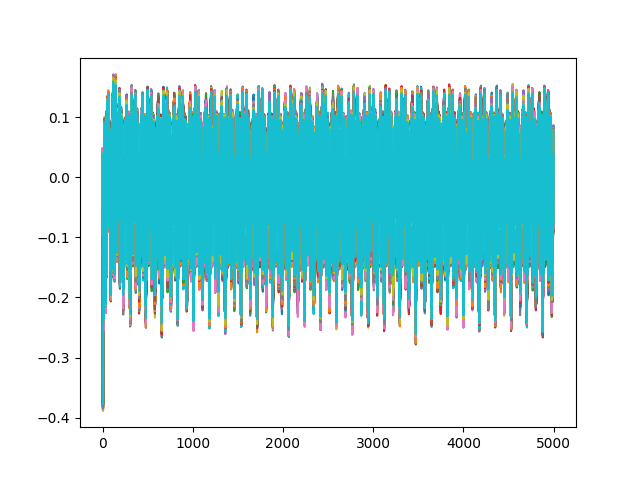

In [52]:
%matplotlib notebook

for d in data:
    plt.plot(d[2])

## Leakage model

In [31]:
%run "Kyber Leakage Model.ipynb"

[901, 2324, 1921, 211, 956, 1339, 3192, 1772, 2975, 582, 3316, 2559, 260, 1853, 2324, 2214, 163, 517, 790, 156, 2276, 426, 2097, 1782, 715, 523, 2233, 1960, 2731, 2637, 1778, 2858, 1547, 1066, 1242, 1645, 312, 595, 2058, 2858, 2802, 1804, 2383, 1365, 3027, 2497, 1547, 679, 1229, 770, 1798, 813, 3027, 2139, 1899, 1977, 2136, 582, 156, 462, 2724, 2513, 127, 1083, 3114, 7, 2311, 2435, 1294, 1274, 783, 348, 1603, 3218, 891, 718, 16, 2471, 1938, 1300, 254, 3085, 2679, 237, 2812, 403, 1528, 2542, 2357, 2266, 1287, 572, 1609, 2263, 1944, 2809, 3254, 2640, 1756, 1557, 1632, 816, 2890, 2910, 891, 1596, 1951, 120, 1808, 250, 107, 2942, 3053, 3170, 182, 2188, 3283, 244, 871, 1297, 2363, 2695, 1720, 1795, 111, 2311, 1889, 2585, 822, 1112, 2464, 3290, 1629, 1661, 429, 198, 842, 1401, 3004, 1063, 862, 341, 1538, 582, 10, 1892, 2643, 2220, 2845, 1206, 585, 458, 3140, 72, 1284, 348, 202, 2708, 2207, 783, 2796, 413, 1993, 2607, 257, 2009, 2578, 81, 2893, 2308, 1895, 1291, 2754, 1756, 3059, 1239, 2497, 

## CPA Model

In [21]:
import numpy as np

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

In [53]:
from tqdm import tnrange
maxcpa = [0] * 65536

trace_array = [x[2] for x in data]
# we don't need to redo the mean and std dev calculations 
# for each key guess
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

for kguess in tnrange(0, 2**16):
    hws = np.array([[getHammingSteg1(ctPoly(d[1], 0), kguess, 0) for d in data]]).transpose()
    #print(ctPoly(d[1], 0))
    #print(getHammingSteg1(ctPoly(d[1], 0), kguess, 0))
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[kguess] = max(abs(cpaoutput))
    

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)
# ###################
# END SOLUTION
# ###################
print("Key guess: ", hex(guess))
print("Correlation: ", guess_corr)
print("Fasit", hex(0x77e), "corr:", maxcpa[0x77e])

C:\Users\erlen\AppData\Local\Temp\ipykernel_21300\894505924.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for kguess in tnrange(0, 2**16):


  0%|          | 0/65536 [00:00<?, ?it/s]

C:\Users\erlen\AppData\Local\Temp\ipykernel_21300\894505924.py:18: RuntimeWarning: invalid value encountered in divide
  cpaoutput = correlation/(o_t*o_hws)


Key guess:  0x0
Correlation:  nan
Fasit 0x77e corr: 0.24314093519196497


In [57]:
print(np.nanmax(maxcpa))

0.40287970836468745


In [59]:
hex(maxcpa.index(0.40287970836468745))

'0x6e6f'

<IPython.core.display.Javascript object>


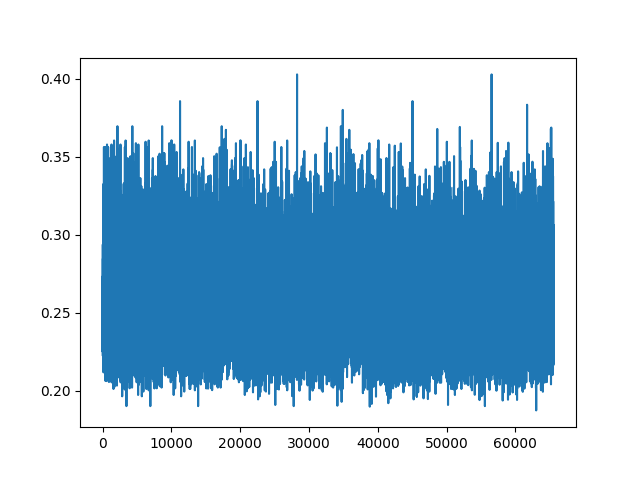

In [60]:
%matplotlib notebook

plt.plot(maxcpa)

### Saving data

In [54]:
import json
with open("dataList", "w") as fp:
    json.dump(data, fp)

TypeError: Object of type ndarray is not JSON serializable

In [55]:
with open("maxcpa", "w") as fp:
    json.dump(maxcpa, fp)

with open("test", "r") as fp:
    b = json.load(fp)